In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cv2.__version__

'4.10.0'

In [13]:
img_ = cv2.imread('right.jpg')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('left.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

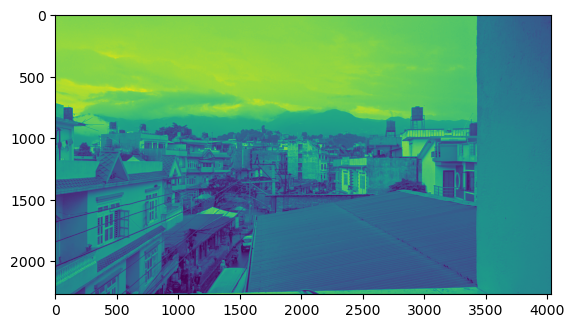

In [14]:
plt.imshow(img1)

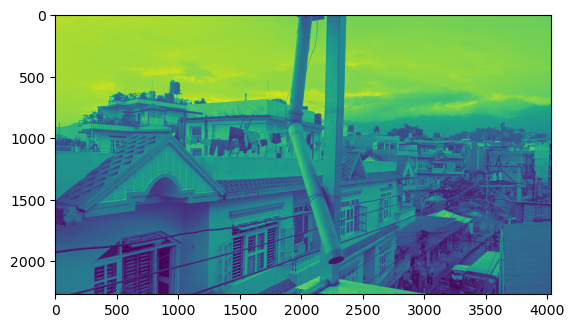

In [15]:
plt.imshow(img2)

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


In [17]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=10)

In [18]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

In [19]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print (H)
else:
    raise AssertionError("Can't find enough keypoints.")


[[ 4.32440562e-01 -1.87301063e-02  2.04943317e+03]
 [-1.57005928e-01  8.45428069e-01  1.72155025e+02]
 [-1.40627578e-04 -3.48513615e-06  1.00000000e+00]]


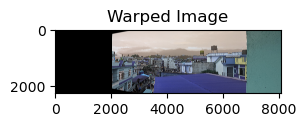

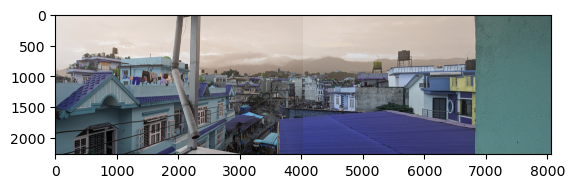

In [20]:
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title("Warped Image")
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite("output.jpg",dst)
plt.imshow(dst)
plt.show()
